In [1]:
!pip install imbalanced-learn

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("League of Legends Ranked Match Data  Season 15 (EUN).csv")
data

,game_id,start_utc,duration,queue,platform_id,map_id,game_mode,game_version,participant_id,champion_id,...,final_omnivamp,final_power,final_powerMax,final_spellVamp,team_baronKills,team_dragonKills,team_towerKills,team_champKills,team_riftHeraldKills,team_inhibitorKills
0,3746362208,2025-02-19T23:59:41Z,2551,Ranked Solo/Duo,EUN1,11,CLASSIC,15.3.656.4086,1,266,...,0,0,0,0,0,4,10,67,0,4
1,3746362208,2025-02-19T23:59:41Z,2551,Ranked Solo/Duo,EUN1,11,CLASSIC,15.3.656.4086,2,141,...,0,757,1260,0,0,4,10,67,0,4
2,3746362208,2025-02-19T23:59:41Z,2551,Ranked Solo/Duo,EUN1,11,CLASSIC,15.3.656.4086,3,99,...,0,699,1729,0,0,4,10,67,0,4
3,3746362208,2025-02-19T23:59:41Z,2551,Ranked Solo/Duo,EUN1,11,CLASSIC,15.3.656.4086,4,110,...,0,1210,2110,0,0,4,10,67,0,4
4,3746362208,2025-02-19T23:59:41Z,2551,Ranked Solo/Duo,EUN1,11,CLASSIC,15.3.656.4086,5,412,...,0,366,965,0,0,4,10,67,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68295,3746063215,2025-02-19T15:31:07Z,1802,Ranked Solo/Duo,EUN1,11,CLASSIC,15.3.656.4086,6,58,...,0,100,100,0,0,3,10,40,1,2
68296,3746063215,2025-02-19T15:31:07Z,1802,Ranked Solo/Duo,EUN1,11,CLASSIC,15.3.656.4086,7,121,...,0,955,955,0,0,3,10,40,1,2
68297,3746063215,2025-02-19T15:31:07Z,1802,Ranked Solo/Duo,EUN1,11,CLASSIC,15.3.656.4086,8,101,...,0,1568,1568,0,0,3,10,40,1,2
68298,3746063215,2025-02-19T15:31:07Z,1802,Ranked Solo/Duo,EUN1,11,CLASSIC,15.3.656.4086,9,67,...,0,738,738,0,0,3,10,40,1,2


In [25]:
data.describe()

,game_id,duration,map_id,participant_id,champion_id,kills,deaths,assists,kda_ratio,kill_participation,...,final_omnivamp,final_power,final_powerMax,final_spellVamp,team_baronKills,team_dragonKills,team_towerKills,team_champKills,team_riftHeraldKills,team_inhibitorKills
count,6.830000e+04,68300.000000,68300.0,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000,...,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000,68300.000000
mean,3.787701e+09,1779.684773,11.0,5.500000,190.979312,6.283455,6.303031,8.467204,3.420334,0.462417,...,0.056237,959.548360,1197.025227,0.006442,0.395974,2.038799,6.026647,31.501757,0.457174,0.989312
std,3.903545e+08,391.697582,0.0,2.872302,236.468793,4.704340,3.280797,6.124137,3.672837,0.155270,...,0.775330,1150.837289,1147.856182,0.401559,0.588148,1.371745,3.664728,12.450017,0.498166,1.251785
min,3.724539e+09,301.000000,11.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.743953e+09,1575.000000,11.0,3.000000,51.000000,3.000000,4.000000,4.000000,1.333333,0.357143,...,0.000000,489.000000,773.000000,0.000000,0.000000,1.000000,3.000000,22.000000,0.000000,0.000000
50%,3.745211e+09,1770.000000,11.0,5.500000,103.000000,5.000000,6.000000,7.000000,2.300000,0.465116,...,0.000000,808.000000,999.000000,0.000000,0.000000,2.000000,6.000000,32.000000,0.000000,0.000000
75%,3.745909e+09,2010.000000,11.0,8.000000,222.000000,9.000000,8.000000,11.000000,4.000000,0.567568,...,0.000000,1141.000000,1413.000000,0.000000,1.000000,3.000000,9.000000,40.000000,1.000000,2.000000
max,7.312932e+09,3485.000000,11.0,10.000000,950.000000,43.000000,23.000000,53.000000,44.000000,1.000000,...,25.000000,10000.000000,10000.000000,26.000000,4.000000,7.000000,15.000000,80.000000,1.000000,12.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68300 entries, 0 to 68299
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_id                       68300 non-null  int64  
 1   start_utc                     68300 non-null  object 
 2   duration                      68300 non-null  int64  
 3   queue                         68300 non-null  object 
 4   platform_id                   68300 non-null  object 
 5   map_id                        68300 non-null  int64  
 6   game_mode                     68300 non-null  object 
 7   game_version                  68300 non-null  object 
 8   participant_id                68300 non-null  int64  
 9   champion_id                   68300 non-null  int64  
 10  champion_name                 68300 non-null  object 
 11  position                      68300 non-null  object 
 12  win                           68300 non-null  bool   
 13  k

In [27]:
data.isnull().sum()[data.isnull().sum() > 0]

solo_tier      674
solo_rank      674
flex_tier    40595
flex_rank    40595
dtype: int64

In [28]:
data["solo_tier"] = data["solo_tier"].fillna("UNRANKED")
data["solo_rank"] = data["solo_rank"].fillna("UNRANKED")
data["flex_tier"] = data["flex_tier"].fillna("UNRANKED")
data["flex_rank"] = data["flex_rank"].fillna("UNRANKED")

In [29]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [30]:
orden_ranking = ["UNRANKED","IRON", "BRONZE", "SILVER", "GOLD", "PLATINUM", "EMERALD", "DIAMOND", "MASTER", "GRANDMASTER","CHALLENGER"]

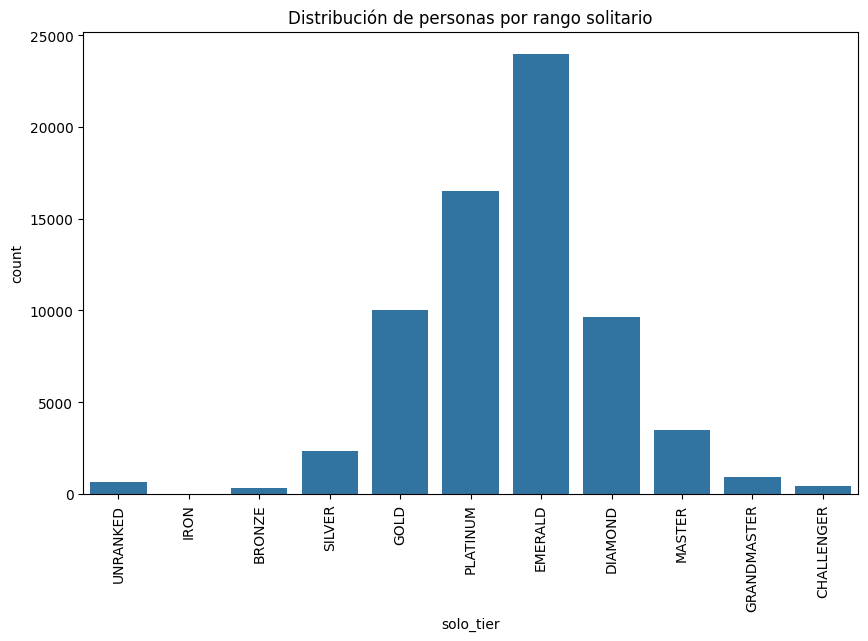

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data, x="solo_tier", order=orden_ranking) 
plt.title("Distribución de personas por rango solitario") 
plt.xticks(rotation=90) 
plt.show()

In [32]:
frecuenciasolo = data["solo_tier"].value_counts()
frecuenciasolo

solo_tier
EMERALD        23974
PLATINUM       16480
GOLD           10022
DIAMOND         9667
MASTER          3491
SILVER          2354
GRANDMASTER      897
UNRANKED         674
CHALLENGER       416
BRONZE           310
IRON              15
Name: count, dtype: int64

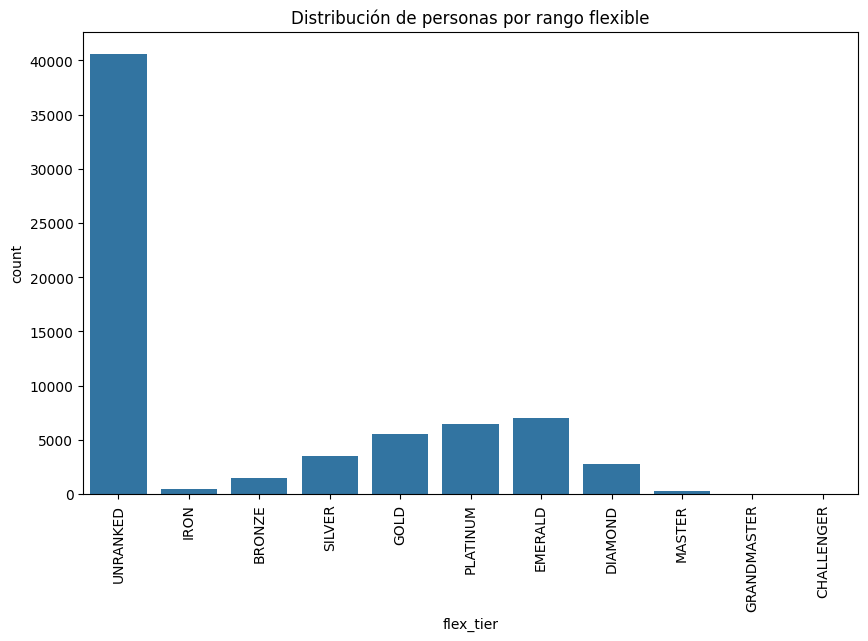

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data, x="flex_tier", order=orden_ranking) 
plt.title("Distribución de personas por rango flexible") 
plt.xticks(rotation=90) 
plt.show()

In [34]:
frecuenciaflex = data["flex_tier"].value_counts()
frecuenciaflex

flex_tier
UNRANKED       40595
EMERALD         7050
PLATINUM        6479
GOLD            5504
SILVER          3532
DIAMOND         2799
BRONZE          1507
IRON             477
MASTER           286
GRANDMASTER       36
CHALLENGER        35
Name: count, dtype: int64

In [35]:
nombres_mas_id = dict(zip(data["champion_id"],data["champion_name"]))
nombres_mas_id

{266: 'Aatrox',
 141: 'Kayn',
 99: 'Lux',
 110: 'Varus',
 412: 'Thresh',
 10: 'Kayle',
 120: 'Hecarim',
 245: 'Ekko',
 236: 'Lucian',
 44: 'Taric',
 14: 'Sion',
 121: 'Khazix',
 910: 'Hwei',
 22: 'Ashe',
 40: 'Janna',
 234: 'Viego',
 45: 'Veigar',
 222: 'Jinx',
 526: 'Rell',
 75: 'Nasus',
 154: 'Zac',
 800: 'Mel',
 267: 'Nami',
 134: 'Syndra',
 39: 'Irelia',
 17: 'Teemo',
 69: 'Cassiopeia',
 81: 'Ezreal',
 518: 'Neeko',
 254: 'Vi',
 7: 'Leblanc',
 8: 'Vladimir',
 67: 'Vayne',
 497: 'Rakan',
 76: 'Nidalee',
 157: 'Yasuo',
 498: 'Xayah',
 58: 'Renekton',
 887: 'Gwen',
 90: 'Malzahar',
 18: 'Tristana',
 117: 'Lulu',
 24: 'Jax',
 223: 'TahmKench',
 48: 'Trundle',
 59: 'JarvanIV',
 777: 'Yone',
 875: 'Sett',
 62: 'MonkeyKing',
 1: 'Annie',
 902: 'Milio',
 106: 'Volibear',
 98: 'Shen',
 21: 'MissFortune',
 350: 'Yuumi',
 54: 'Malphite',
 133: 'Quinn',
 53: 'Blitzcrank',
 113: 'Sejuani',
 31: 'Chogath',
 78: 'Poppy',
 131: 'Diana',
 163: 'Taliyah',
 96: 'KogMaw',
 32: 'Amumu',
 61: 'Orianna',

In [36]:
data = data.drop(columns= ["game_id", "start_utc", "duration", "queue", "platform_id", "map_id", "game_mode", "game_version", "participant_id", "champion_name", "win", "item0", "item1", "item2", "item3", "item4", "item5", "item6", "solo_rank", "flex_tier", "flex_rank", "flex_lp", "flex_wins", "flex_losses", "mastery_lastPlayTime","mastery_pointsSinceLastLevel", "mastery_pointsUntilNextLevel", "mastery_tokens", "final_abilityHaste", "final_abilityPower", "final_armor", "final_attackDamage", "final_attackSpeed", "final_movementSpeed", "final_health", "final_healthMax", "final_lifesteal", "final_omnivamp", "final_power", "final_powerMax", "final_spellVamp", "solo_lp"])

In [37]:
data

,champion_id,position,kills,deaths,assists,kda_ratio,kill_participation,gold_earned,gold_spent,gold_per_min,...,solo_wins,solo_losses,mastery_level,mastery_points,team_baronKills,team_dragonKills,team_towerKills,team_champKills,team_riftHeraldKills,team_inhibitorKills
0,266,TOP,17,3,18,11.666667,0.522388,18548,17600,436.252450,...,40,34,31,357243,0,4,10,67,0,4
1,141,JUNGLE,10,9,16,2.888889,0.388060,16373,14875,385.096041,...,101,103,4,20196,0,4,10,67,0,4
2,99,MIDDLE,15,8,29,5.500000,0.656716,17483,16075,411.203450,...,40,35,17,191886,0,4,10,67,0,4
3,110,BOTTOM,21,8,14,4.375000,0.522388,20630,20650,485.221482,...,37,29,4,15064,0,4,10,67,0,4
4,412,SUPPORT,4,9,29,3.666667,0.492537,12144,11450,285.629165,...,66,52,40,412853,0,4,10,67,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68295,58,TOP,8,2,3,5.500000,0.275000,15451,12775,514.461709,...,22,21,15,156116,0,3,10,40,1,2
68296,121,JUNGLE,13,0,9,22.000000,0.550000,14868,12875,495.049945,...,25,28,20,192815,0,3,10,40,1,2
68297,101,MIDDLE,13,6,7,3.333333,0.500000,12640,11125,420.865705,...,33,46,7,43142,0,3,10,40,1,2
68298,67,BOTTOM,3,3,8,3.666667,0.275000,12206,10750,406.415094,...,8,8,10,75815,0,3,10,40,1,2


In [38]:
data = data[data["solo_tier"] != "IRON"]

In [39]:
data["solo_tier"].value_counts()

solo_tier
EMERALD        23974
PLATINUM       16480
GOLD           10022
DIAMOND         9667
MASTER          3491
SILVER          2354
GRANDMASTER      897
UNRANKED         674
CHALLENGER       416
BRONZE           310
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
data["position"] = le.fit_transform(data["position"])

C:\Users\ehlna\AppData\Local\Temp\ipykernel_27996\1943106153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["position"] = le.fit_transform(data["position"])


In [42]:
X = data.drop("solo_tier", axis=1)
y = data["solo_tier"]

In [43]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [44]:
from imblearn.under_sampling import RandomUnderSampler

In [45]:
undersample = RandomUnderSampler(sampling_strategy="majority")

In [46]:
X_over, y_over = undersample.fit_resample(X,y)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

<Axes: >

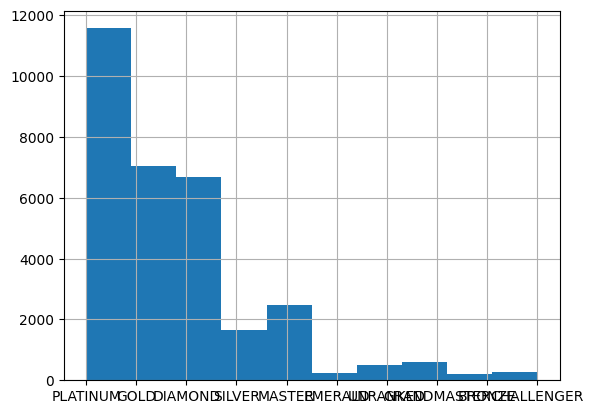

In [49]:
y_train.hist()

In [50]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0    1    0   24    0    0   77    1    0]
 [   0    4   68    0    1    0    6   50    0    0]
 [   0    0  922    0  153    0   22 1879    0    1]
 [   0    0   15    0    9    0    0   61    0    0]
 [   2    0  254    0  558    0    8 2157    6    0]
 [   0    0  141    0   10    4    9  122    0    0]
 [   0    0  403    0   30    0   63  535    0    0]
 [   0    0  664    0  459    0   14 3771    8    0]
 [   1    0   35    0  150    0    1  497    4    0]
 [   0    0    0    0    0    0    0    0    0  187]]


c:\Users\ehlna\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ehlna\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      BRONZE       0.00      0.00      0.00       103
  CHALLENGER       1.00      0.03      0.06       129
     DIAMOND       0.37      0.31      0.34      2977
     EMERALD       0.00      0.00      0.00        85
        GOLD       0.40      0.19      0.25      2985
 GRANDMASTER       1.00      0.01      0.03       286
      MASTER       0.51      0.06      0.11      1031
    PLATINUM       0.41      0.77      0.54      4916
      SILVER       0.21      0.01      0.01       688
    UNRANKED       0.99      1.00      1.00       187

    accuracy                           0.41     13387
   macro avg       0.49      0.24      0.23     13387
weighted avg       0.42      0.41      0.35     13387



c:\Users\ehlna\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
model_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [7,10],
    'n_estimators': [100, 200],
    'max_features': [10, 20],
    'min_samples_leaf': [2, 4]
}

grid = GridSearchCV(model_grid, gr_space, cv = 3, scoring='f1_macro', verbose = 3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=2, n_estimators=100;, score=0.191 total time=  13.9s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=2, n_estimators=100;, score=0.188 total time=  12.8s
[CV 3/3] END max_depth=7, max_features=10, min_samples_leaf=2, n_estimators=100;, score=0.189 total time=  13.5s
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=2, n_estimators=200;, score=0.190 total time=  25.9s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=2, n_estimators=200;, score=0.186 total time=  25.1s
[CV 3/3] END max_depth=7, max_features=10, min_samples_leaf=2, n_estimators=200;, score=0.189 total time=  25.8s
[CV 1/3] END max_depth=7, max_features=10, min_samples_leaf=4, n_estimators=100;, score=0.190 total time=  12.2s
[CV 2/3] END max_depth=7, max_features=10, min_samples_leaf=4, n_estimators=100;, score=0.187 total time=  13.1s
[CV 3/3] END max_depth=7, max_featu

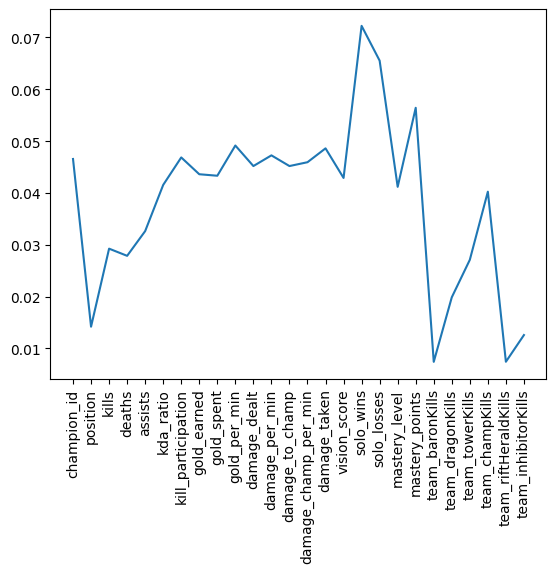

In [52]:
importances = model.feature_importances_
plt.plot(X_train.columns,importances)
plt.xticks(rotation = 90)
plt.show()